In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
df= pd.read_csv('/content/heart.csv')

In [10]:
print(df.shape)
print(df.info())
print(df.head())


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0      

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: ylabel='count'>

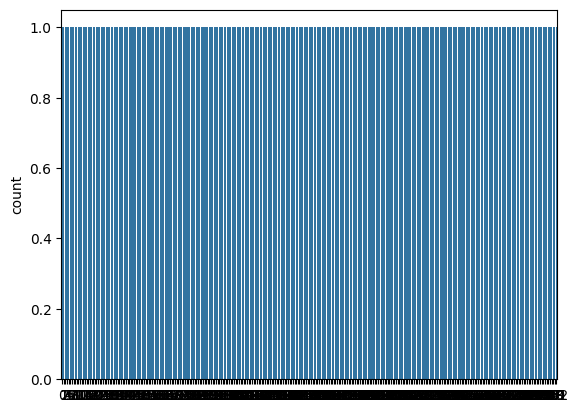

In [13]:
sns.countplot(df['target'])

In [16]:
x = df.drop(columns=['target'])
y = df['target']
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [21]:
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)




In [22]:
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring='roc_auc')
best_model = clf.fit(x,y)

In [23]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score:', best_model.best_score_)

Best leaf_size: 9
Best p: 1
Best n_neighbors: 7
Best Score: 0.7483536683904332


In [24]:
y_pred = best_model.predict(x_test)


In [26]:
print(classification_report(y_test, y_pred))
print("AUC 5CORE is",roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

AUC 5CORE is 0.8060344827586207
